# ARIMA(X) Results based on 2,000 Chunks


## Load Data and Reduce

pmdarima and Train Size 30 are not relevant

In [12]:
import pandas as pd
arimax_overview = pd.read_parquet('../data/arima-x_forecast_overview_first2000_2021-07-28T13-58-13_extended.parquet', engine='pyarrow')

In [13]:
arimax_overview_red = arimax_overview[arimax_overview.LIBRARY != 'pmdarima']
arimax_overview_red = arimax_overview_red[arimax_overview_red.FIRST_FORECAST != '30']

## Visualization of TS,MCC and Evaluation Score

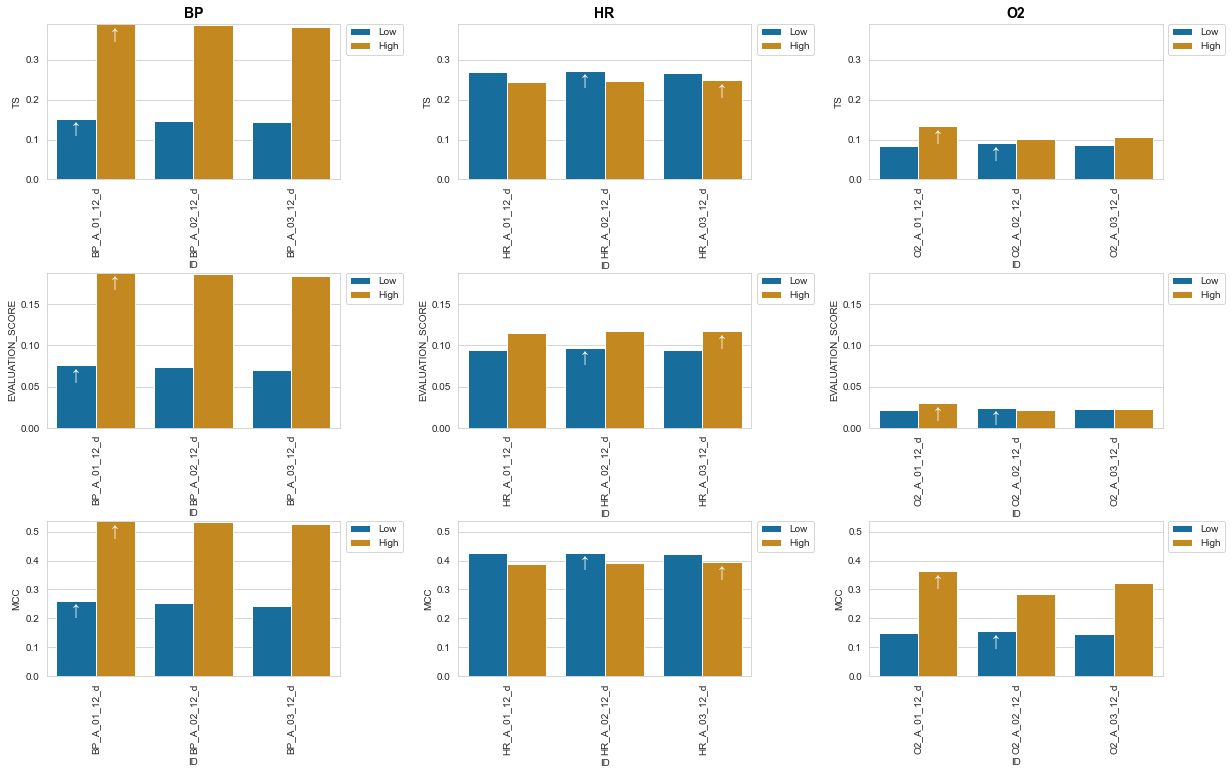

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview_red

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    3,
    3,
    figsize = (20, 12),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ts_ylimits = [0,max(overview.TS)]
evaluation_score_score_ylimits = [0,max(overview.EVALUATION_SCORE)]
mcc_ylimits = [0,max(overview.MCC)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TS',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(ts_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_ts_low = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TS.max()]['TS'].unique()
    best_ts_high = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TS.max()]['TS'].unique()

    for bar in plot1.patches:
        if bar.get_height() == best_ts_low or bar.get_height() == best_ts_high :
            plot1.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1,i].set_ylim(evaluation_score_score_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()

    for bar in plot2.patches:
        if bar.get_height() == best_evaluation_score_low or bar.get_height() == best_evaluation_score_high :
            plot2.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot3 = sns.barplot(
        ax = axs[2,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='MCC',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[2,i].set_ylim(mcc_ylimits)
    axs[2,i].tick_params(axis="x", rotation=90)
    axs[2,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_mcc_low = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].MCC.max()]['MCC'].unique()
    best_mcc_high = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].MCC.max()]['MCC'].unique()

    for bar in plot3.patches:
        if bar.get_height() == best_mcc_low or bar.get_height() == best_mcc_high :
            plot3.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')  

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_metrics_arima-x_first2000' + timestamp + '.png'), dpi=72, bbox_inches='tight')
    

    

plt.show(fig)

## Visualization of  Evaluation Score (as Final Model Selection)

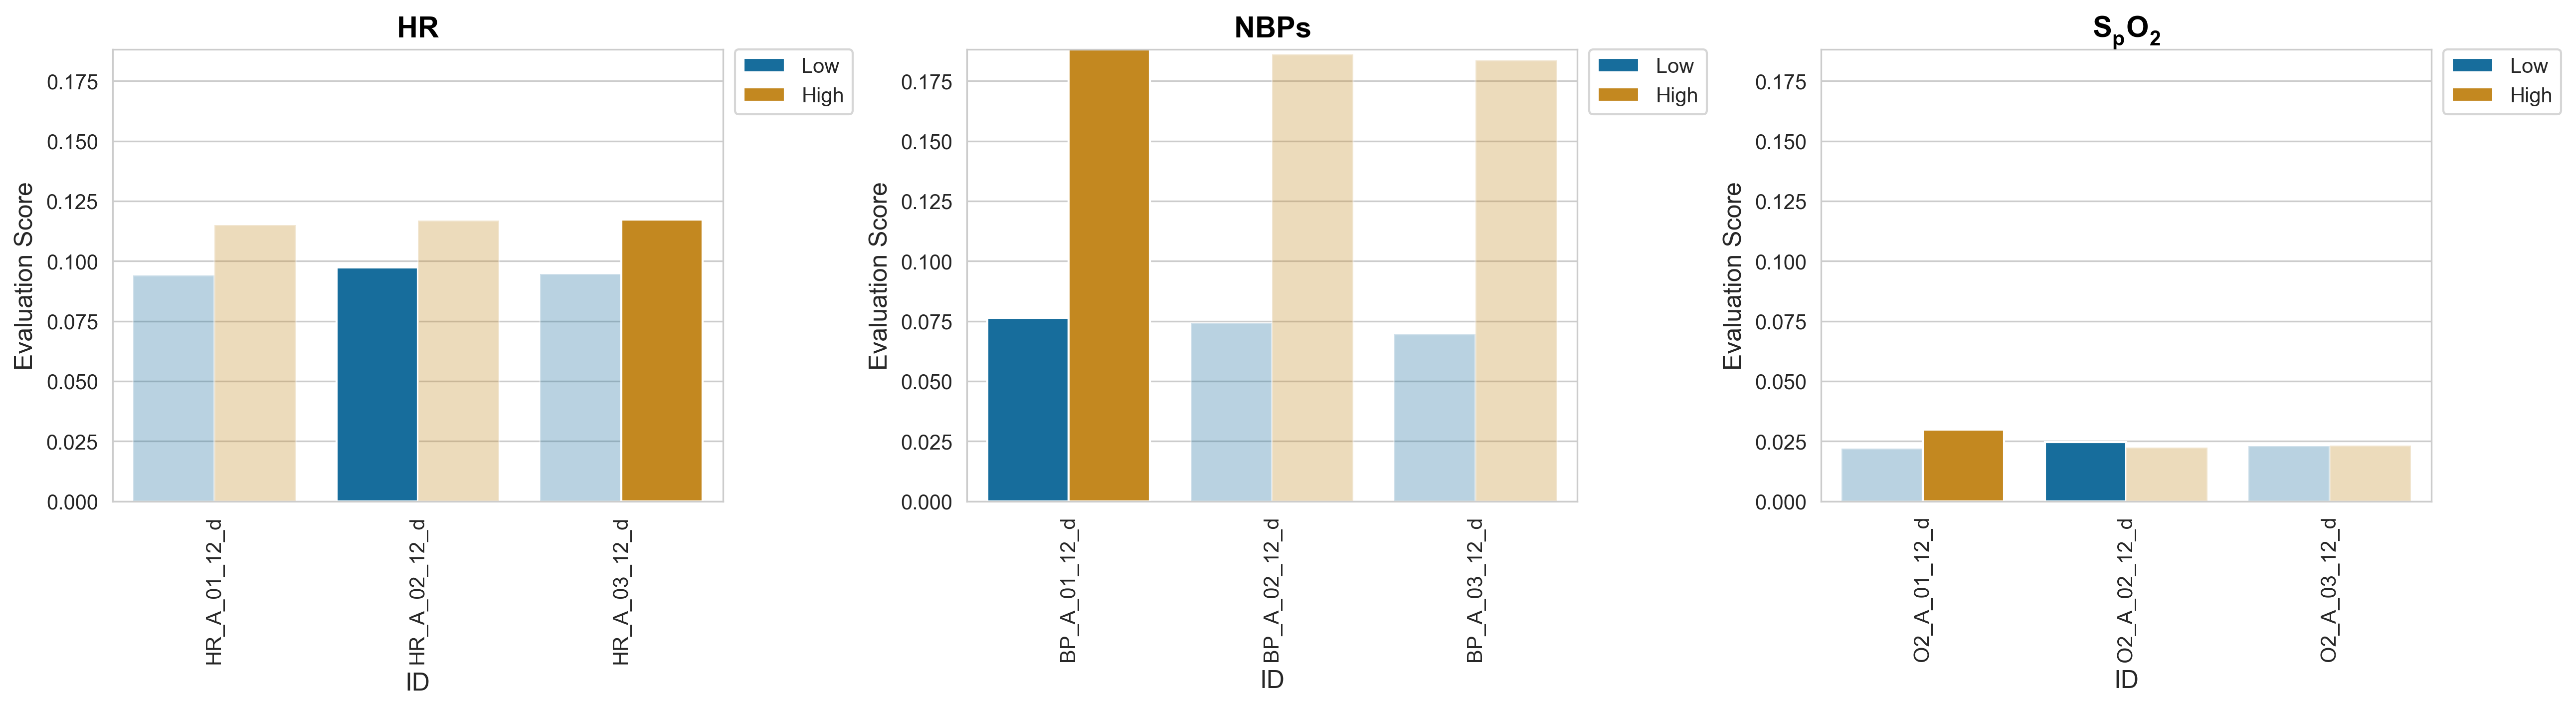

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview_red

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)
title = "ARIMA(X) - Model Selection"

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    for bar in plot1.patches:
        if bar.get_height() != best_evaluation_score_low and bar.get_height() != best_evaluation_score_high :
            bar.set_alpha(0.3)
 

   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_score_arima-x_first2000_transparent' + timestamp + '.png'), dpi=300, bbox_inches='tight')
    

    

plt.show(fig)

Version without Transparency

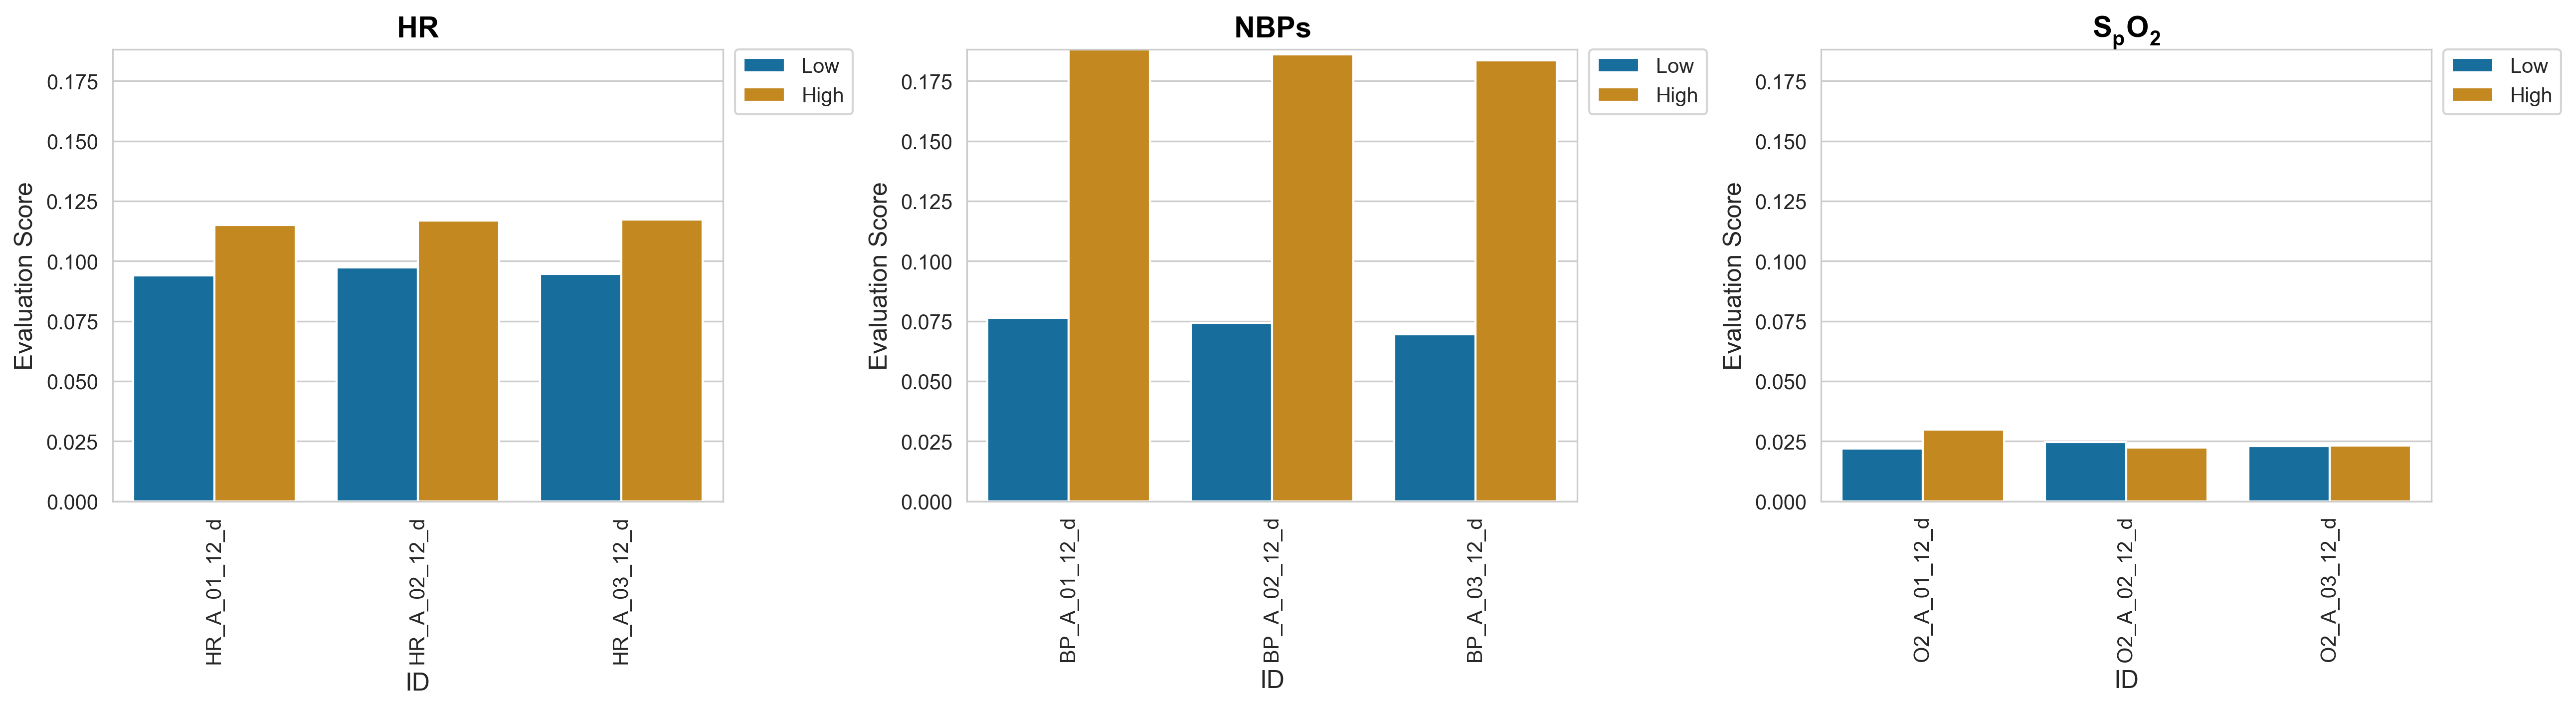

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview_red
# overview = arimax_overview[arimax_overview.LIBRARY == 'darts']

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)
title = "ARIMA(X) - Model Selection"

fig, axs = plt.subplots(
    1,
    3,
    figsize = (20, 4),
    dpi = 300
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)
parameter_label =["$\mathregular{HR}$","$\mathregular{NBPs}$","$\mathregular{S_pO_2}$"]

evaluation_score_ylimits = [0,max(overview.EVALUATION_SCORE)]

for i, parameter in enumerate(['HR', 'BP', 'O2']):

    plot1 = sns.barplot(
        ax = axs[i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[i].set_title(str(parameter_label[i]), fontweight='bold', color= 'black', fontsize=14)
    axs[i].set_xlabel('ID', fontsize=12)
    axs[i].set_ylabel('Evaluation Score', fontsize=12)
    axs[i].set_ylim(evaluation_score_ylimits)
    axs[i].tick_params(axis="x", rotation=90)
    axs[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)  


   

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_score_arima-x_first2000' + timestamp + '.png'), dpi=300, bbox_inches='tight') 

    

plt.show(fig)